<a href="https://colab.research.google.com/github/FelipeCostt4/notebookPimaIndiansDiabetes/blob/main/C%C3%B3pia_de_Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
from google.colab import auth
from google.colab import drive
import git

# Autenticação do GitHub (com autenticação via token ou chave SSH)
auth.authenticate_user()

# Monta o Google Drive (caso esteja usando o Google Drive para armazenar o notebook)
drive.mount('/content/drive')

# Defina o caminho do seu repositório local no Google Colab
repo_path = '/content/drive/MyDrive/Colab Notebooks/Praticando/Pima Indians Diabetes Database'

# Clona o repositório (caso não tenha feito isso antes)
!git clone https://github.com/FelipeCostt4/notebookPimaIndiansDiabetes.git {repo_path}

# Navega até a pasta do repositório
os.chdir(repo_path)

# Caso queira fazer algo de forma automática, você pode usar um comando git para adicionar, fazer commit e enviar para o GitHub
!git add .
!git commit -m "Atualização automática do notebook"
!git push origin main


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Testedddada**

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Praticando/Pima Indians Diabetes Database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


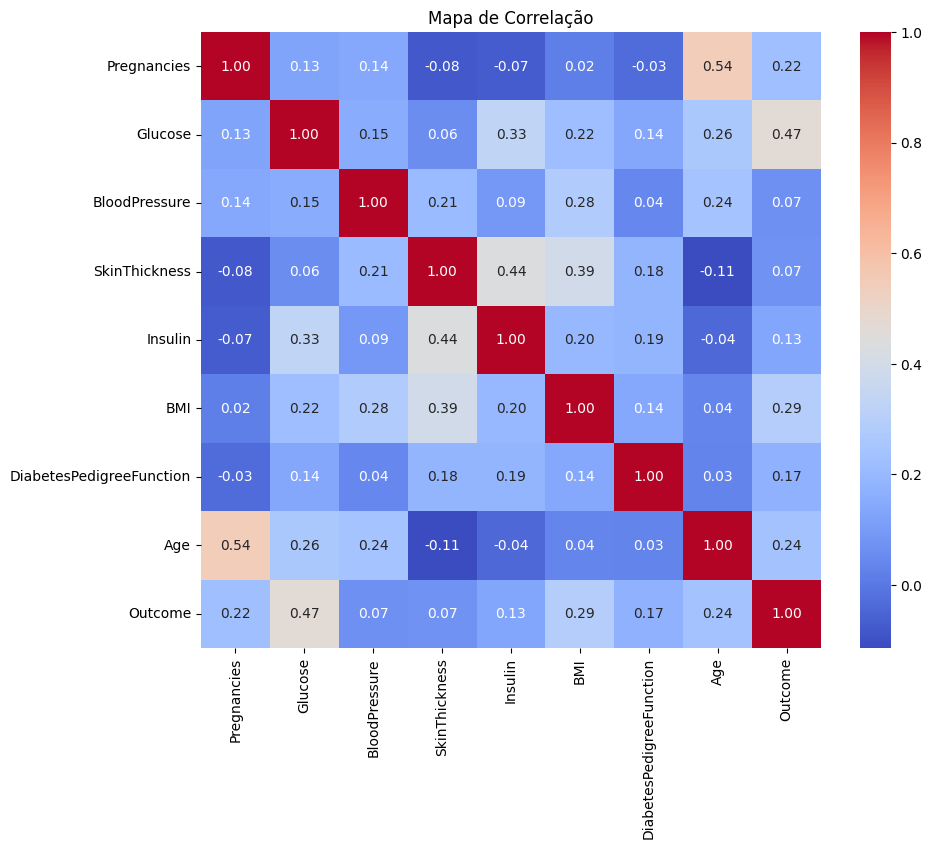

In [9]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()

In [10]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [14]:
confusion_matrix(y_test, y_pred)

array([[78, 21],
       [18, 37]])

In [15]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80        99\n           1       0.64      0.67      0.65        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.73      0.73       154\nweighted avg       0.75      0.75      0.75       154\n'

In [16]:
accuracy_score(y_test, y_pred)

0.7467532467532467

In [17]:
novo_paciente = [[2, 130, 70, 20, 79, 25.5, 0.5, 30]]

predicao = model.predict(novo_paciente)
probabilidade = model.predict_proba(novo_paciente)

if predicao[0] == 1:
    print("Este paciente provavelmente tem diabetes.")
else:
    print("Este paciente provavelmente NÃO tem diabetes.")

print("Probabilidade:", round(probabilidade[0][1]*100, 2), "%")

Este paciente provavelmente NÃO tem diabetes.
Probabilidade: 18.98 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
